In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast 

In [94]:
df = pd.read_parquet('datasets/clean_movies_dataset.parquet')


In [95]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return'],
      dtype='object')

In [96]:
df.shape

(45379, 20)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45462
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4489 non-null   object        
 1   budget                 45379 non-null  int64         
 2   genres                 45379 non-null  object        
 3   id                     45379 non-null  int64         
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45379 non-null  float64       
 7   production_companies   45379 non-null  object        
 8   production_countries   45379 non-null  object        
 9   release_date           45379 non-null  datetime64[ns]
 10  revenue                45379 non-null  int64         
 11  runtime                45133 non-null  float64       
 12  spoken_languages       45379 non-null  object        
 13  status

hola, aqui lo de los nulos

In [98]:
df.isnull().sum()

belongs_to_collection    40890
budget                       0
genres                       0
id                           0
original_language           11
overview                   941
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                    246
spoken_languages             0
status                      80
tagline                  24980
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
dtype: int64

In [99]:
df.describe()

,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537900e+04,45379.000000,45379.000000,45379,4.537900e+04,45133.000000,45379.000000,45379.000000,45379.000000,4.537900e+04
mean,4.232325e+06,108029.978955,2.926356,1992-05-16 02:18:40.324379136,1.122936e+07,94.181043,5.624079,110.089931,1991.882236,6.599991e+02
min,0.000000e+00,2.000000,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26386.500000,0.388835,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59859.000000,1.130503,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156538.000000,3.690686,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2020-12-16 00:00:00,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07
std,1.743932e+07,112166.713796,6.009491,NaN,6.438789e+07,38.340053,1.915381,491.727295,24.054986,7.469083e+04


In [100]:
df.describe(include=['O'])

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,spoken_languages,status,tagline,title
count,4489,45379,45368,44438,45379,45379,45379,45299,20399,45379
unique,1695,4066,89,44235,22706,2390,1931,6,20270,42198
top,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...","[{'id': 18, 'name': 'Drama'}]",en,No overview found.,[],"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella
freq,29,4998,32204,133,11796,17846,22382,44939,7,11


disribución de variables numericas

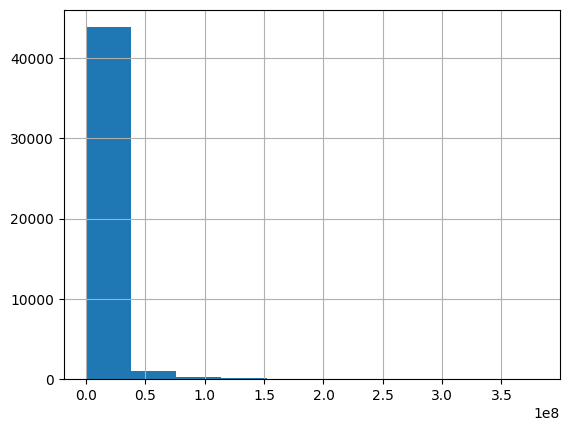

In [101]:
df['budget'].hist()
plt.show()

posibles outliers, el eje x, hace referencia a las variables numericas, y el eje Y a la fecuencia de las mismas 

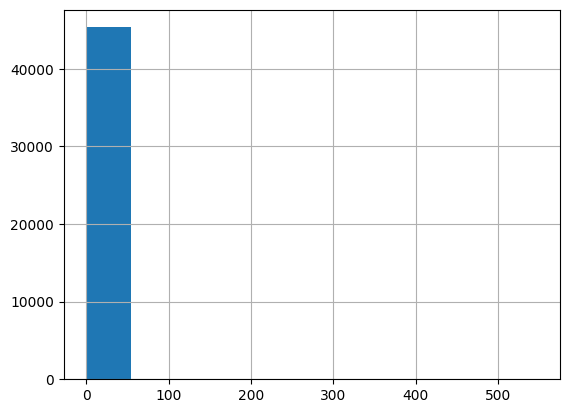

In [102]:
df['popularity'].hist()
plt.show()

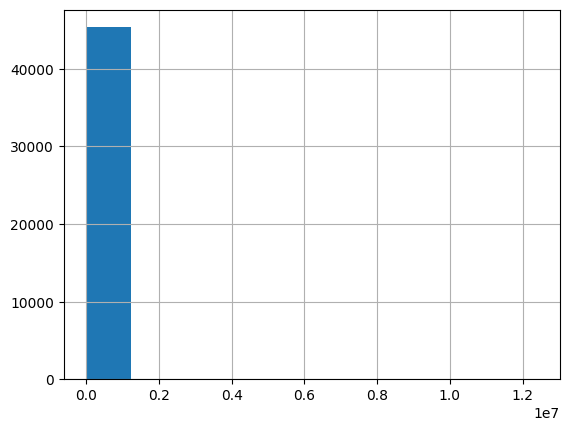

In [103]:

df['return'].hist()
plt.show()

lista de categoricas

In [104]:
"""df['genres'].value_counts().plot(kind='bar').title.set_text('genres')
plt.show()"""

"df['genres'].value_counts().plot(kind='bar').title.set_text('genres')\nplt.show()"

correlacion entre variables numericas

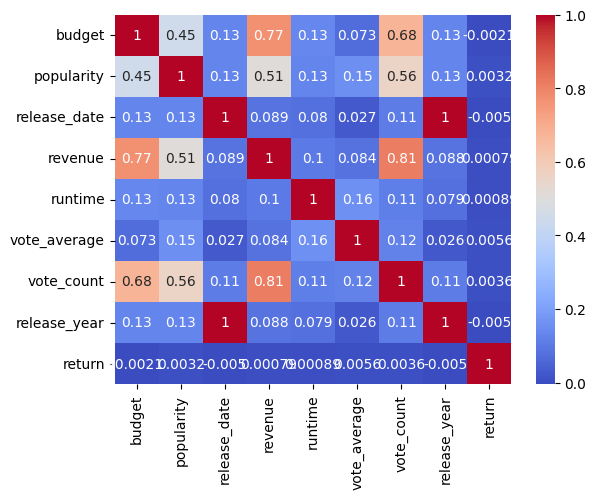

In [105]:
numericas = ['budget','popularity','release_date','revenue','runtime','vote_average','vote_count','release_year','return']
corr_matrix = df[numericas].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

descarto las variables con menos correlacion con las otras, las cuales serían, runtime, vote_average, vote_count, release_year, return

In [106]:
numericas = ['budget','popularity','revenue','vote_count']

Comparacion de las distribuciones de variables numéricas según categorías utilizando gráficos de caja (boxplots):

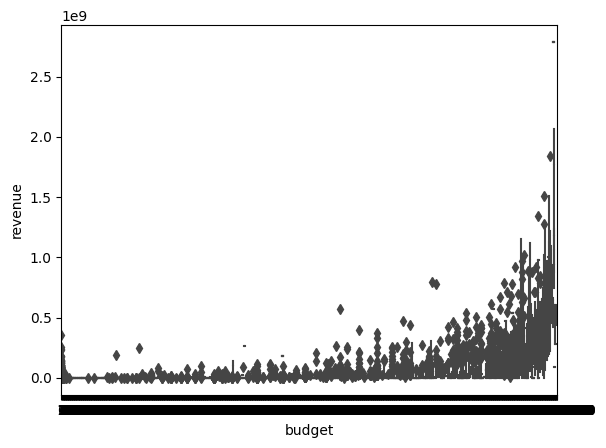

In [107]:
sns.boxplot(x='budget', y='revenue', data=df)
plt.show()

a mayor presupuesto, mayor retorno

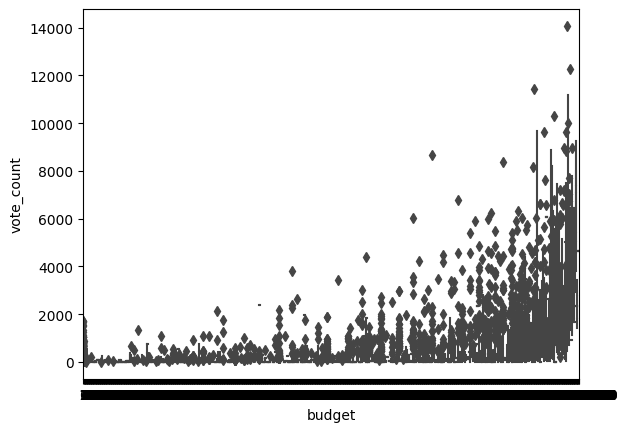

In [108]:
sns.boxplot(x='budget', y='vote_count', data=df)
plt.show()

a mayor presupuesto, también mayor cantidad de votos contados

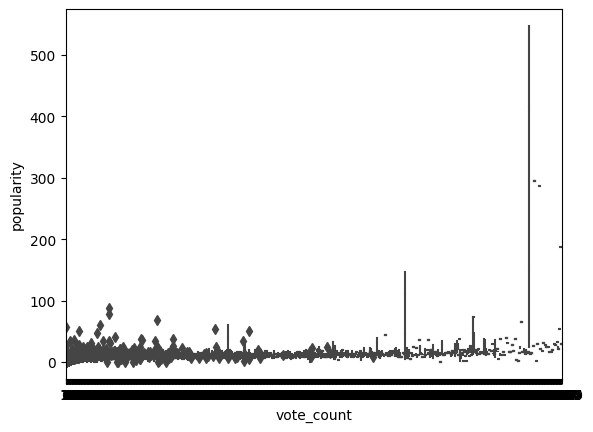

In [109]:
sns.boxplot(y='popularity', x='vote_count', data=df)
plt.show()

Estudio de la variable target "titulo"

In [160]:
df = pd.read_parquet('datasets/clean_movies_dataset.parquet')
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return'],
      dtype='object')

In [169]:
if df.belongs_to_collection.loc[df.title == 'Jumanji'].item() == None:
    coleccion = 1
else:
    coleccion = df.belongs_to_collection.loc[df.title == 'Jumanji'].item()
df['pertenece_colecion'] = df.belongs_to_collection.apply(lambda x: 1 if  coleccion== x else 0)

df.pertenece_colecion

0        0
1        0
2        0
3        0
4        0
        ..
45457    0
45459    0
45460    0
45461    0
45462    0
Name: pertenece_colecion, Length: 45379, dtype: int64

sistema de recomendación

In [176]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

def recomendacion(titulo:str):

    #creo un clon del df original con las columnas genres, title, vote_average, popularity, para que la funcion recomendacion no consuma demasiados recursos
    df_b = df.loc[:, ['belongs_to_collection','genres','title','vote_average','popularity']].copy()

    #la columna genres, tiene valores muy complejos, cada fila tiene una lista de diccionarios, con el codigo de abajo, los generos quedan un string sencillo
    df_b.genres = df_b.genres.apply(lambda x : ast.literal_eval(x))
    def normalizar_generos(x):
        #esta funcion, saca los generos de los diccioanrios, volviendolos un string con todos los generos de la pelicula
        lista =""
        for i in x:
            lista += (i['name'])
            if i == x[-1]:
                break
            lista += ","
        return lista
    #se aplica el codigo de arriba
    df_b.genres = df_b.genres.apply(lambda x : normalizar_generos(x)) 

    #al igual que la columna genres, la columna belongs_to_collection tiene datos complejos, con el codigo de abajo se normaliza
    df_b.belongs_to_collection = df_b.belongs_to_collection.apply(lambda x : ast.literal_eval(x) if type(x) == str else x)
    df_b.belongs_to_collection = df_b.belongs_to_collection.apply(lambda x : x['name'] if type(x) == dict else x)

    

    #se crea columnas de valores unicos con cada uno de los valores disponibles de la columna genres
    generos_df = df_b.genres.str.get_dummies(sep=',')

    #Se crea una columna donde se almacena si los titulos del df son similares al ingresado, con 1 ( si contiene el titulo en su nombre) y con 0 ( si no contiene el titulo en su nombre)
    df_b['titulo_similar']= df_b.title.apply(lambda x: 1 if titulo in x else 0)

    #Se crea una columna donde se almacena si los titulos del df pertenecen a la misma coleccion que el ingresado,
    # con 1 ( si contiene el titulo en su nombre) y con 0 ( si no contiene el titulo en su nombre)
    
    if df.belongs_to_collection.loc[df.title == titulo].item() == None:
        coleccion = 'no pertenece a ninguna coleccion'
    else:
        coleccion = df.belongs_to_collection.loc[df.title == titulo].item()
    df_b['pertenece_colecion'] = df_b.belongs_to_collection.apply(lambda x: 1 if  coleccion== x else 0)

    #se crea el objeto knn, que será el modelo de recomendación a través de vecinos cercanos
    knn = NearestNeighbors(n_neighbors=6, algorithm='auto')

    #se normalizan las columnas popularity y vote_average
    escalar = StandardScaler()
    df_b[['popularity', 'vote_average']] = escalar.fit_transform(df_b[['popularity', 'vote_average']])

    #se definen los parametros con los que se van a entrenar al modelo, concatenando varias columnas anteriomente descritas
    parametros_entrenamiento = pd.concat([generos_df,df_b['pertenece_colecion'],df_b['titulo_similar'],df_b['vote_average'],df_b['popularity']],axis=1)

    #entrenamiento del modelo
    knn.fit(parametros_entrenamiento)

    # se muestran los resultados del modelo
    indices = knn.kneighbors(parametros_entrenamiento.loc[df['title'] == titulo])[1].flatten()

    recomendaciones = list(df.iloc[indices]['title'])
    recomendaciones = sorted( recomendaciones, key= lambda x:(df_b.loc[df_b.title ==x]['titulo_similar'].values[0],df.loc[df['title'] == x]['vote_average'].values[0] ),reverse=True )
    recomendaciones = [pelicula for pelicula in recomendaciones if pelicula != titulo]
    return {'lista recomendada': recomendaciones[:5]}

In [179]:
recomendacion('Harry Potter and the Deathly Hallows: Part 1')

{'lista recomendada': ['Harry Potter and the Deathly Hallows: Part 2',
  'Harry Potter and the Prisoner of Azkaban',
  'Harry Potter and the Goblet of Fire',
  'The Wizard of Oz',
  'Harry Potter and the Half-Blood Prince']}